In [59]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Loading the data
df = pd.read_csv('Train_SU63ISt.csv')




In [61]:
# viewing the first 5 values od dataset
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [62]:
#BASIC EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [63]:
#Convering DateTime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M', errors='coerce')


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [65]:
df.describe()

,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [66]:
# Extracting Date column from DateTime column
df['Date'] = df['Datetime'].dt.date
df.head()


,ID,Datetime,Count,Date
0,0,2012-08-25 00:00:00,8,2012-08-25
1,1,2012-08-25 01:00:00,2,2012-08-25
2,2,2012-08-25 02:00:00,6,2012-08-25
3,3,2012-08-25 03:00:00,2,2012-08-25
4,4,2012-08-25 04:00:00,2,2012-08-25


In [67]:
#Setting Date as index
df = df.set_index(['Date'])
df.head()

,ID,Datetime,Count
Date,,,
2012-08-25,0,2012-08-25 00:00:00,8
2012-08-25,1,2012-08-25 01:00:00,2
2012-08-25,2,2012-08-25 02:00:00,6
2012-08-25,3,2012-08-25 03:00:00,2
2012-08-25,4,2012-08-25 04:00:00,2


In [68]:
#dropping the not requied column
df = df.drop( 'Datetime', axis=1)



In [69]:
df.head()

,ID,Count
Date,,
2012-08-25,0,8
2012-08-25,1,2
2012-08-25,2,6
2012-08-25,3,2
2012-08-25,4,2


In [70]:
df.isnull().sum()

ID       0
Count    0
dtype: int64

<Axes: >

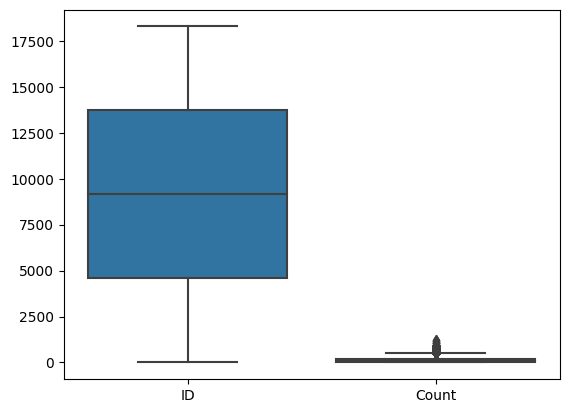

In [71]:
#Checking the outliers by Box plot
sns.boxplot(data = df)

In [72]:
from scipy import stats

z_scores = stats.zscore(df['Count'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = df.index[outliers]


In [73]:
outlier_indices.value_counts

<bound method IndexOpsMixin.value_counts of Index([2013-08-15, 2013-11-21, 2014-04-10, 2014-05-28, 2014-05-28, 2014-06-03,
       2014-06-05, 2014-06-05, 2014-06-05, 2014-06-05,
       ...
       2014-09-25, 2014-09-25, 2014-09-25, 2014-09-25, 2014-09-25, 2014-09-25,
       2014-09-25, 2014-09-25, 2014-09-25, 2014-09-25],
      dtype='object', name='Date', length=313)>

In [74]:
df_cleaned = df[~outliers]


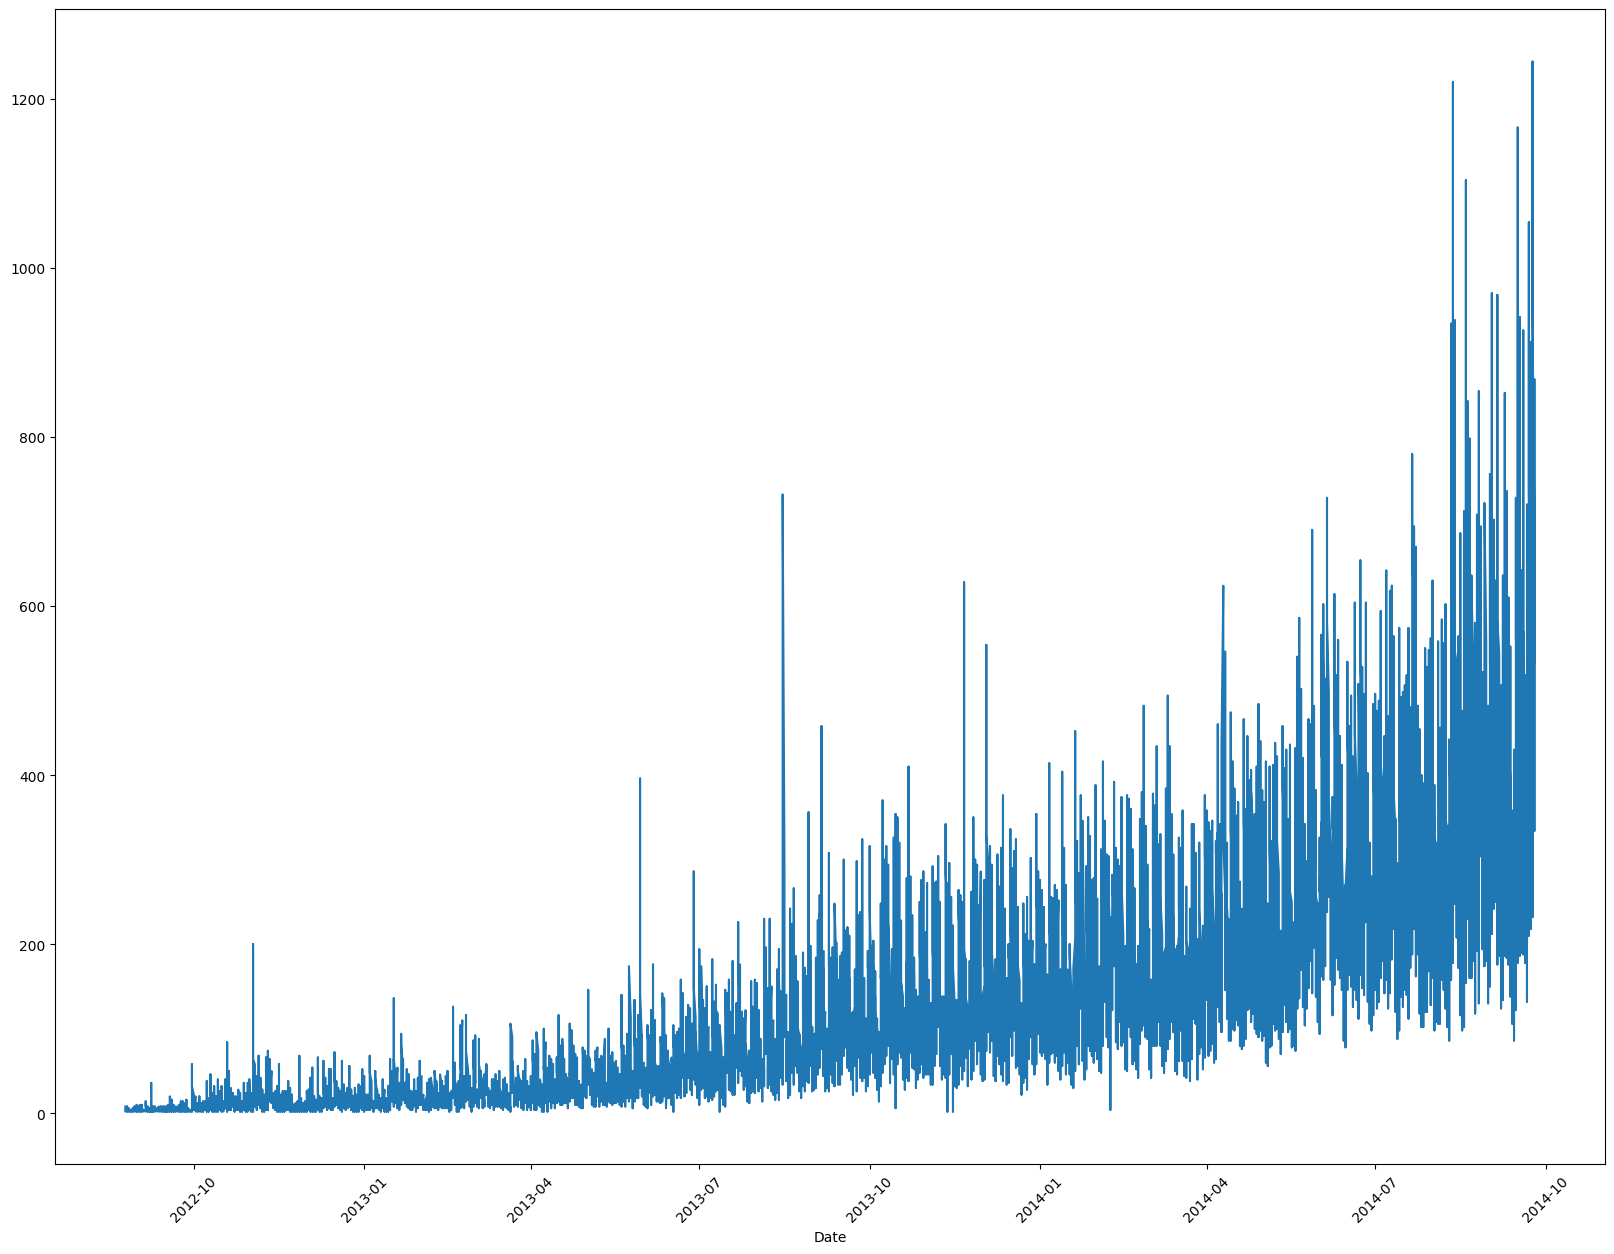

In [76]:
# Plotting the Trend of Data
plt.figure(figsize=(20,15))

df['Count'].plot(x=df.index)

plt.xticks(rotation = 45)
plt.show()

In [77]:
# imprting Adfuller
from statsmodels.tsa.stattools import adfuller
#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(df)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ValueError: ignored

In [78]:
from statsmodels.tsa.stattools import adfuller

# Extract the 'Count' column from the DataFrame
count_values = df['Count']

# ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(count_values)

print(f'ADF Statistic: {result[0]}')  # ADF Statistic
print(f'p-value: {result[1]}')         # p-value
print(f'n_lags: {result[2]}')          # Number of lags used in the regression

if result[1] > 0.05:
    print("The series is not stationary")
else:
    print("The series is stationary")


ADF Statistic: -4.456560536856827
p-value: 0.00023540466467665005
n_lags: 45
The series is stationary


In [80]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf


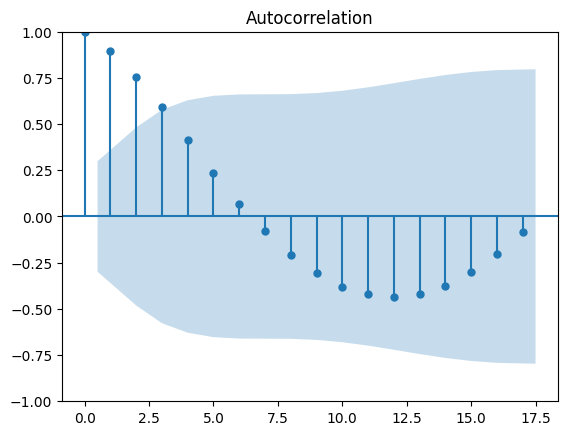

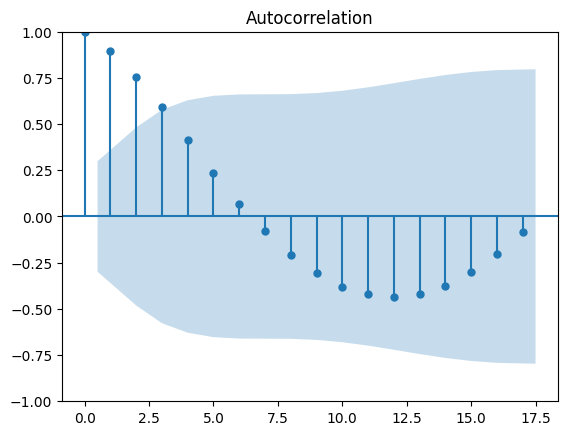

In [82]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Extract the 'Count' column from the DataFrame
count_values = df['Count']

# Calculate the ACF
acf_plot = acf(count_values.dropna())

# Plot the ACF
plot_acf(acf_plot)


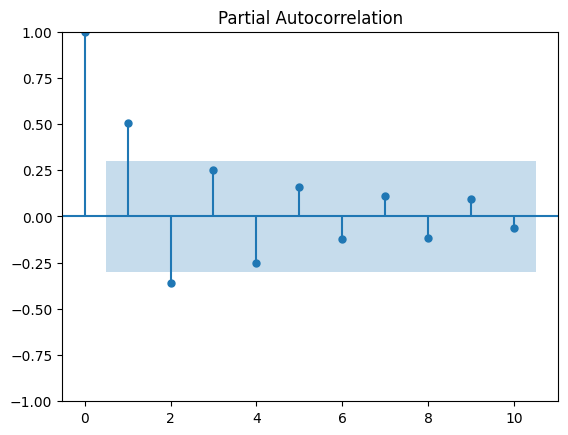

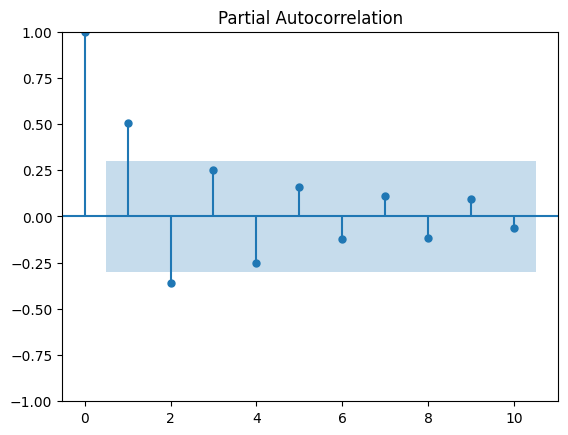

In [84]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Extract the 'Count' column from the DataFrame
count_values = df['Count']

# Calculate the PACF
pacf_plot = pacf(count_values.dropna())

# Plot the PACF
plot_pacf(pacf_plot, lags=10)


In [85]:
# Splitting the train and test data

In [86]:
train=df.iloc[:120]['Count']
test=df.iloc[120:]['Count']

In [87]:
# impoting the model
from statsmodels.tsa.arima.model import ARIMA

In [88]:
# fitting the model
model = ARIMA(train, order  =(1,1,2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [89]:
# Loading the test data for prediction
test_df = pd.read_csv('Test_0qrQsBZ.csv')
test_df.shape


(5112, 2)

In [90]:
test_df.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [91]:
test_df['Datetime'] = pd.to_datetime(test_df['Datetime'])


In [92]:
test_df['Date'] = test_df['Datetime'].dt.date



In [93]:
test_df = test_df.set_index(['Date'])
test_df.head()

,ID,Datetime
Date,,
2014-09-26,18288,2014-09-26 00:00:00
2014-09-26,18289,2014-09-26 01:00:00
2014-09-26,18290,2014-09-26 02:00:00
2014-09-26,18291,2014-09-26 03:00:00
2014-09-26,18292,2014-09-26 04:00:00


In [94]:
test_df = test_df.drop( 'Datetime', axis=1)
test_df.head()


,ID
Date,
2014-09-26,18288
2014-09-26,18289
2014-09-26,18290
2014-09-26,18291
2014-09-26,18292


In [95]:
# Make predictions on the 'test' dataset
predictions = model_fit.predict(start=len(test), end=len(test) + len(test) - 1, dynamic=True, typ='levels')

# Add the predictions to the 'test' DataFrame
test['predictions'] = predictions


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warni

In [96]:
test['predictions']

18168    2.495794
18169    2.495794
18170    2.495794
18171    2.495794
18172    2.495794
           ...   
36331    2.495794
36332    2.495794
36333    2.495794
36334    2.495794
36335    2.495794
Name: predicted_mean, Length: 18168, dtype: float64

In [103]:

# save the CSV file
output_csv_file = 'predicted_valuees.csv'

# Save the 'test' DataFrame with predictions to a CSV file
test.to_csv(output_csv_file, index=False)
